# Challenge 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Example code that is useful for the following questions:

# (df.query('age in [35, 38, 55]')
#    .assign(new_column = df["age"]/df["fare"],
#            new_column_1 = df["age"]/df["fare"])
#    .loc[:,["survived", "sex", "class", "embark_town", "fare", "new_column", "new_column_1"]]
#    .groupby(["embark_town", "sex"])
#    .quantile([0.25,0.75])
#    # .max("fare")
#    # .sort_values(["new_column"])
#    # .pivot_table(...)
#    .rename(columns={'new_column': 'fraction'})
# )

In [5]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [14]:
def calc_bmi(weight, height):
        if weight/((height/100)**2) > 25: # Divide by 100 since height is in centimeters
            return 1
        elif weight/(height**2) <= 25:
            return 0

df['overweight'] = df.apply(lambda x: calc_bmi(x.weight, x.height), axis=1)

In [17]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,0.622086
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,0.484870
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
def calc_norm_123(input):
        if input == 1: 
            return 0
        else:
              return 1

df['cholesterol'] = df.apply(lambda x: calc_norm_123(x.cholesterol), axis=1)
df['gluc'] = df.apply(lambda x: calc_norm_123(x.gluc), axis=1)

In [20]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [36]:
sub_df = df.loc[:, ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight']]

In [51]:
sub_df.tail(10)

,cholesterol,gluc,smoke,alco,active,cardio,overweight
69990,0,0,0,0,1,1,1
69991,1,1,0,0,1,0,1
69992,0,0,0,0,1,1,0
69993,0,0,0,0,1,1,0
69994,0,0,0,0,1,1,1
69995,0,0,1,0,1,0,1
69996,1,1,0,0,1,1,1
69997,1,0,0,1,0,1,1
69998,0,1,0,0,0,1,1
69999,1,0,0,0,1,0,0


In [111]:
test =  pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
test = test.sort_values('variable', ascending=True)

In [100]:
# for col in ['cardio', 'variable', 'value']: # 'cardio', 'variable', 'value'
#     test[col] = test[col].astype('object') # 'category'

Text(405.33978515624995, 0.5, 'total')

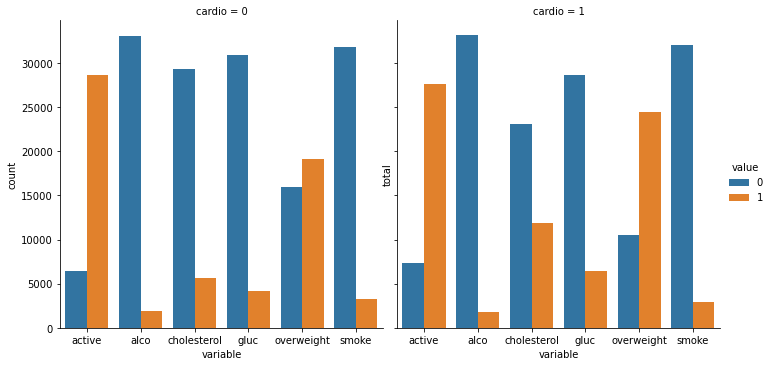

In [114]:
sns.catplot(
    data=test, x="variable", col = 'cardio', hue='value',
    kind="count"
)

In [21]:
tit = sns.load_dataset("titanic")

In [56]:
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [90]:
data_url="https://bit.ly/3aYBbhQ"
#data_url ="https://raw.githubusercontent.com/datavizpyr/data/master/SO_data_2019/StackOverflow_survey_filtered_subsampled_2019.csv"
data = pd.read_csv(data_url)

In [95]:
data.dtypes

CompTotal       float64
Gender           object
Manager          object
YearsCode        object
Age1stCode       object
YearsCodePro     object
Education        object
dtype: object

In [99]:
data.head()

,CompTotal,Gender,Manager,YearsCode,Age1stCode,YearsCodePro,Education
0,180000.0,Man,IC,25,17,20,Master's
1,55000.0,Man,IC,5,18,3,Bachelor's
2,77000.0,Man,IC,6,19,2,Bachelor's
3,67017.0,Man,IC,4,20,1,Bachelor's
4,90000.0,Man,IC,6,26,4,Less than bachelor's


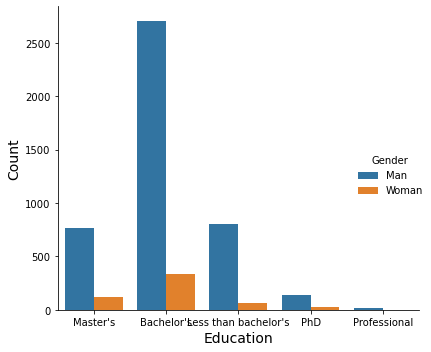

In [98]:
sns.catplot( x='Education',
             kind="count", 
             hue="Gender", 
             height=5, 
             data=data)
plt.xlabel("Education", size=14)
plt.ylabel("Count", size=14)
plt.tight_layout()